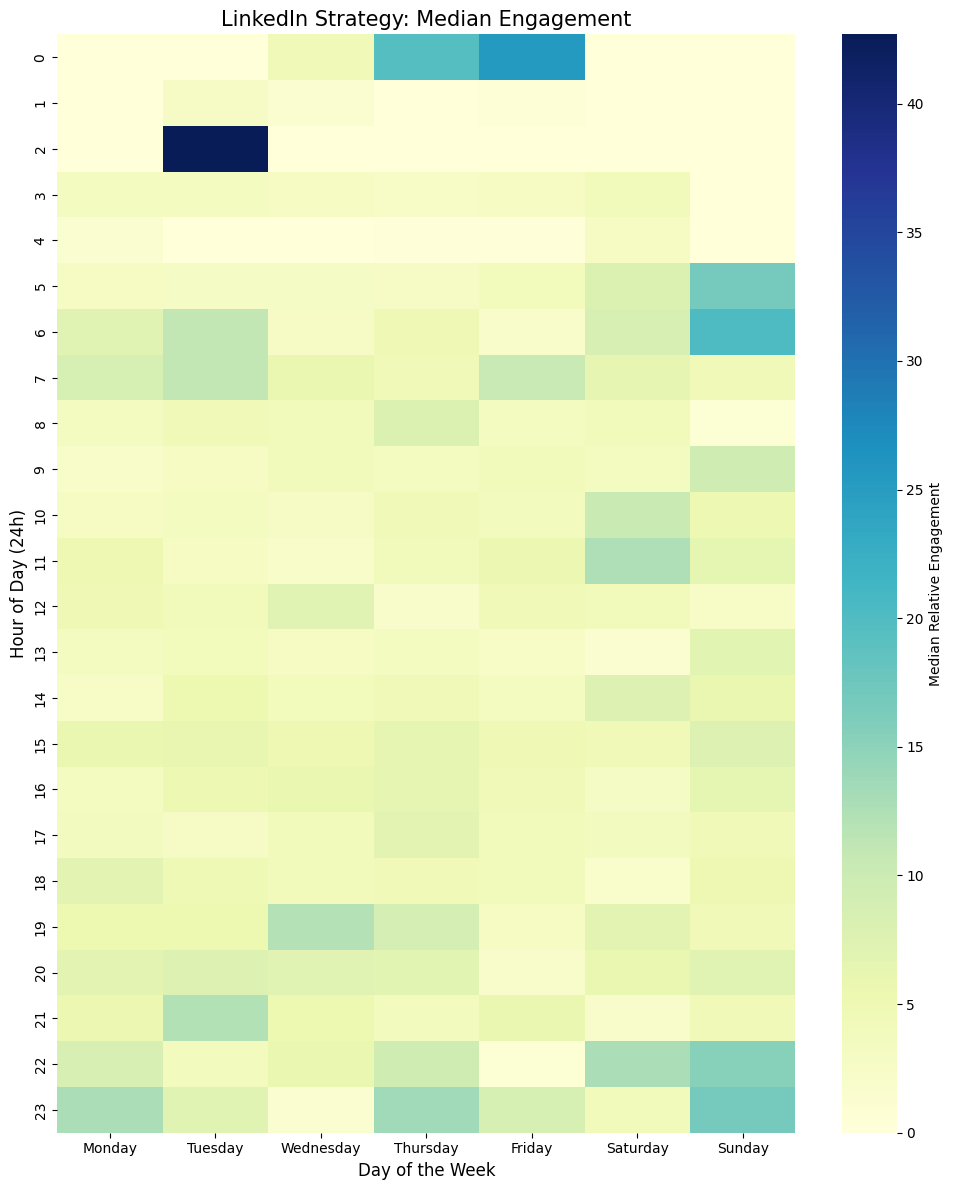

Hours excluded due to low volume: []


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('../data/Master_Dataset_LinkedIn.csv')

# 2. Prepare Time Data
df['Post Timestamp DT'] = pd.to_datetime(df['Post Timestamp DT'], errors='coerce')
df = df.dropna(subset=['Post Timestamp DT'])
df['Hour'] = df['Post Timestamp DT'].dt.hour
df['Day of Week'] = df['Post Timestamp DT'].dt.day_name()

# Sort Days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=days_order, ordered=True)

# 3. Apply Statistical Significance Filter
# We only include hours that have at least 10 posts in the entire dataset
hour_counts = df['Hour'].value_counts()
significant_hours = hour_counts[hour_counts >= 0].index
df_filtered = df[df['Hour'].isin(significant_hours)].copy()

# 4. Create Pivot Table (Day on X, Hour on Y)
heatmap_data = df_filtered.pivot_table(
    index='Hour', 
    columns='Day of Week', 
    values='Relative Engagement', 
    aggfunc='median',
    observed=True
).fillna(0)

# 5. Visualize
plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Median Relative Engagement'})

plt.title('LinkedIn Strategy: Median Engagement', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Hour of Day (24h)', fontsize=12)
plt.tight_layout()
plt.show()

# 6. Print Results
print(f"Hours excluded due to low volume: {sorted(list(set(range(24)) - set(significant_hours)))}")